# FCR-D Analysis of Price and volumes

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import requests
import os


## Run API
If you haven't loaded this before run the API. It will take a little bit to run depending on your computer. (Took me 2 min)
Otherwise if already run before save it in a CSV file and load that file instead.

In [2]:

desktop = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop') 
print(os.getcwd())
This_file_path = os.getcwd()
total_string_len = len(This_file_path)
print(total_string_len)

string_len_to_remove = len("Data Examination")
print(string_len_to_remove)

path = This_file_path[0:(total_string_len-string_len_to_remove)]
print(path)
path_processed_data = path + "Processed_data\\"
print(path_processed_data)

c:\Users\Daniel  BV\Desktop\Thesis\lightenup\Data Examination
61
16
c:\Users\Daniel  BV\Desktop\Thesis\lightenup\
c:\Users\Daniel  BV\Desktop\Thesis\lightenup\Processed_data\


## Load CSV file
If API has already been runned, load the csv instead. 1 second versus 2 minutes ;-) 

In [29]:
df_raw = pd.read_csv(path_processed_data + 'real.csv') # Change path
print(df_raw.head())
#print(df["Spot"].size)
#df2 = pd.read_csv('FCR_Energinet_Data.csv') # Change path
#df3 = df2["HourDK"].unique()
#print(df3.size)
#print(pd.to_datetime(df3))
#pd.to_datetime(df2["HourDK"]) # Convert HourDK to datetimeprint(df), such that one can use it to index



   Hour       Spot  FD1_down  FD2_down   FD1_up    FD2_up  FD1_up_percentage   
0     0  46.599998  42.42105  33.89313  1.95478  49.18715           0.034299  \
1     1  41.330002  42.42105  33.89313  1.95492  49.33709           0.012891   
2     2  42.180000  43.36842  33.89313  1.96262  49.71026           0.013107   
3     3  44.369999  42.42105  33.89313  1.96222  49.45940           0.013804   
4     4  37.669998  41.78947  33.89313  1.95644  49.52272           0.009886   

   FD2_up_percentage  FD1_down_percentage  FD2_down_percentage  FD_act_up   
0           0.965701             0.126667             0.873333        0.0  \
1           0.987109             0.126667             0.873333        0.0   
2           0.986893             0.126667             0.873333        0.0   
3           0.986196             0.126667             0.873333        0.0   
4           0.990114             0.126667             0.873333        0.0   

   FD_act_down  
0     0.000000  
1     0.000282  
2    

In [30]:
Latest_time = '2022-01-01T00:00:00'
Earliest_time = '2023-03-31T23:00:00'

# Create a DatetimeIndex with hourly frequency
date_range = pd.date_range(start=Latest_time, end=Earliest_time, freq='H')

# Create an empty DataFrame with the desired index
df_HourDK_series = pd.DataFrame(index=date_range)

# Optionally, you can reset the index if you want a separate column for the timestamps
df_HourDK_series.reset_index(inplace=True)

df_spot = df_raw["Spot"]
print(df["Spot"].size,df_HourDK_series.size)

# Assuming you have another DataFrame called df_spot
# Concatenate df_HourDK_series and df_spot
concatenated_df = pd.concat([df_HourDK_series, df_spot], axis=1)
df = concatenated_df.rename(columns={"index": "HourDK"})
print(concatenated_df)

10920 10920
                    index       Spot
0     2022-01-01 00:00:00  46.599998
1     2022-01-01 01:00:00  41.330002
2     2022-01-01 02:00:00  42.180000
3     2022-01-01 03:00:00  44.369999
4     2022-01-01 04:00:00  37.669998
...                   ...        ...
10915 2023-03-31 19:00:00  92.500000
10916 2023-03-31 20:00:00  48.080002
10917 2023-03-31 21:00:00  40.930000
10918 2023-03-31 22:00:00  35.849998
10919 2023-03-31 23:00:00  30.040001

[10920 rows x 2 columns]


# FCR-D price Analysis

In [ ]:
Latest_time = '2023-01-02T00:00:00'
Earliest_time = '2023-01-05T23:00:00'

fig, axs = plt.subplots(figsize=(8, 6), dpi=100)

mask = (df["HourDK"] >= Latest_time) & (df["HourDK"] <= Earliest_time)
price = df["Spot"].loc[mask].reset_index(drop=True)
plt.plot(price, drawstyle='steps-post')

xaxis = df["HourDK"].loc[mask].reset_index(drop=True)
xaxis = pd.to_datetime(xaxis)# Convert xaxis to datetime

# Set the x-axis ticks to be monthly
num_ticks = len(xaxis)
tick_step = max(1, int(np.ceil(num_ticks / 12))) # Show at least one tick per month
month_ticks = xaxis.index % tick_step == 0
if not month_ticks[0]:
    month_ticks[0] = True
if not month_ticks[-1]:
    month_ticks[-1] = True
plt.xticks(xaxis.index[month_ticks], xaxis[month_ticks].dt.strftime("%d/%m/%Y %H"), rotation=45)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylabel("DA price [EUR/MW]")
plt.show()


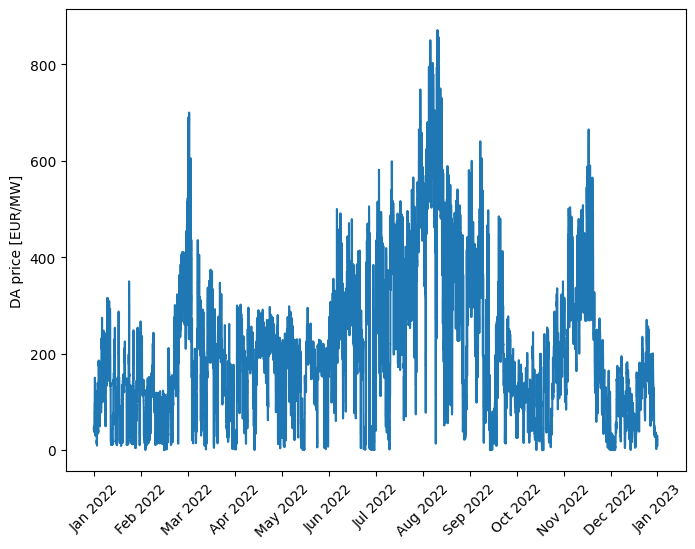

In [50]:
Latest_time = '2022-01-01T00:00:00'
Earliest_time = '2023-01-30T23:00:00'

fig, axs = plt.subplots(figsize=(8, 6), dpi=100)

mask = (df["HourDK"] >= Latest_time) & (df["HourDK"] <= Earliest_time)
price = df["Spot"].loc[mask].reset_index(drop=True)
plt.plot(price, drawstyle='steps-post')

xaxis = df["HourDK"].loc[mask].reset_index(drop=True)
xaxis = pd.to_datetime(xaxis)# Convert xaxis to datetime

# Set the x-axis ticks to be monthly
num_ticks = len(xaxis)
tick_step = max(1, int(np.ceil(num_ticks / 12))) # Show at least one tick per month
month_ticks = xaxis.index % tick_step == 0
if not month_ticks[0]:
    month_ticks[0] = True
if not month_ticks[-1]:
    month_ticks[-1] = True
plt.xticks(xaxis.index[month_ticks], xaxis[month_ticks].dt.strftime("%b %Y"), rotation=45)


#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylabel("DA price [EUR/MW]")
plt.show()


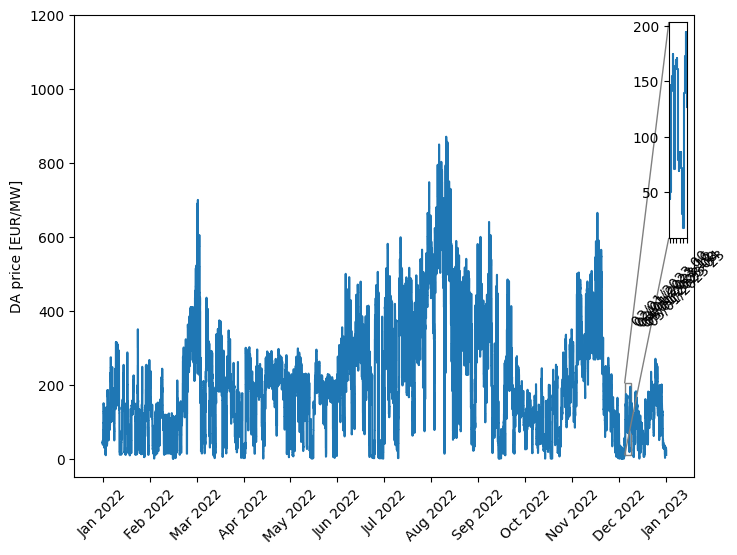

In [78]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import pandas as pd

# First plot
Latest_time = '2022-01-01T00:00:00'
Earliest_time = '2023-01-30T23:00:00'

fig, axs = plt.subplots(figsize=(8, 6), dpi=100)

mask = (df["HourDK"] >= Latest_time) & (df["HourDK"] <= Earliest_time)
price = df["Spot"].loc[mask].reset_index(drop=True)
plt.plot(price, drawstyle='steps-post')

xaxis = df["HourDK"].loc[mask].reset_index(drop=True)
xaxis = pd.to_datetime(xaxis)

# Set the x-axis ticks to be monthly
num_ticks = len(xaxis)
tick_step = max(1, int(np.ceil(num_ticks / 12)))
month_ticks = xaxis.index % tick_step == 0
if not month_ticks[0]:
    month_ticks[0] = True
if not month_ticks[-1]:
    month_ticks[-1] = True
plt.xticks(xaxis.index[month_ticks], xaxis[month_ticks].dt.strftime("%b %Y"), rotation=45)
axs.set_ylim(-50, 1200)

plt.ylabel("DA price [EUR/MW]")

# Second plot (zoomed-in)
Latest_time_zoom = '2023-01-02T00:00:00'
Earliest_time_zoom = '2023-01-05T23:00:00'

mask_zoom = (df["HourDK"] >= Latest_time_zoom) & (df["HourDK"] <= Earliest_time_zoom)
price_zoom = df["Spot"].loc[mask_zoom]
xaxis_zoom = df["HourDK"].loc[mask_zoom]
xaxis_zoom = pd.to_datetime(xaxis_zoom)

# Create a zoomed-in subplot
ax_zoom = zoomed_inset_axes(axs, zoom=3, loc='upper right')  # Adjust the zoom factor as needed

# Plot the zoomed-in data
ax_zoom.plot(price_zoom, drawstyle='steps-post')

# Set the x-axis ticks for the zoomed-in plot

num_ticks = len(xaxis_zoom)
tick_step = max(1, int(np.ceil(num_ticks / 5)))
month_ticks = xaxis_zoom.index % tick_step == 0
if not month_ticks[0]:
    month_ticks[0] = True
if not month_ticks[-1]:
    month_ticks[-1] = True
ax_zoom.set_xticks(xaxis_zoom[month_ticks].index)
ax_zoom.set_xticklabels(xaxis_zoom[month_ticks].dt.strftime("%d/%m/%Y %H"), rotation=45)

# Mark the area in the first plot that corresponds to the zoomed-in plot
mark_inset(axs, ax_zoom, loc1=3, loc2=2, fc="none", ec="0.5")

plt.show()


AttributeError: 'Series' object has no attribute 'strftime'

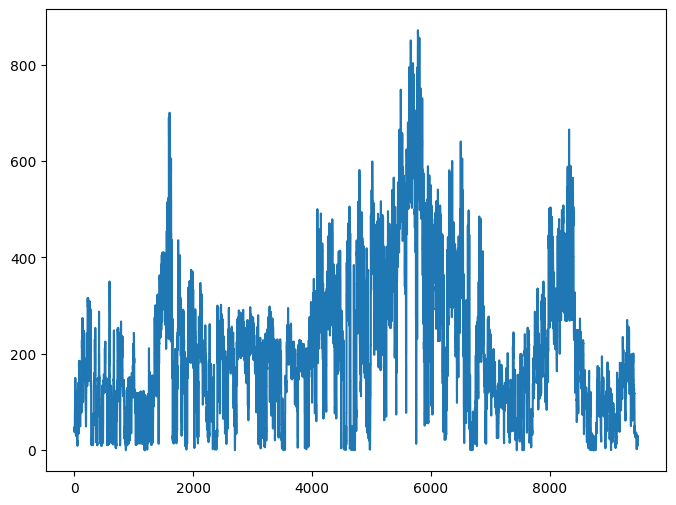

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import pandas as pd

# First plot
Latest_time = '2022-01-01T00:00:00'
Earliest_time = '2023-01-30T23:00:00'

fig, axs = plt.subplots(figsize=(8, 6), dpi=100)

mask = (df["HourDK"] >= Latest_time) & (df["HourDK"] <= Earliest_time)
price = df["Spot"].loc[mask].reset_index(drop=True)
plt.plot(price, drawstyle='steps-post')

xaxis = df["HourDK"].loc[mask].reset_index(drop=True)
xaxis = pd.to_datetime(xaxis)

# Set the x-axis ticks to be monthly
num_ticks = len(xaxis)
tick_step = max(1, int(np.ceil(num_ticks / 12)))
month_ticks = xaxis.index % tick_step == 0
if not month_ticks[0]:
    month_ticks[0] = True
if not month_ticks[-1]:
    month_ticks[-1] = True
plt.xticks(xaxis.index[month_ticks], xaxis[month_ticks].strftime("%b %Y"), rotation=45)

plt.ylabel("DA price [EUR/MW]")

# Second plot (zoomed-in)
Latest_time_zoom = '2023-01-02T00:00:00'
Earliest_time_zoom = '2023-01-05T23:00:00'

mask_zoom = (df["HourDK"] >= Latest_time_zoom) & (df["HourDK"] <= Earliest_time_zoom)
price_zoom = df["Spot"].loc[mask_zoom].reset_index(drop=True)
xaxis_zoom = df["HourDK"].loc[mask_zoom].reset_index(drop=True)
xaxis_zoom = pd.to_datetime(xaxis_zoom)

# Create a zoomed-in subplot
ax_zoom = inset_axes(axs, width="40%", height="40%", loc="upper left")

# Plot the zoomed-in data
ax_zoom.plot(price_zoom, drawstyle='steps-post')

# Set the x-axis ticks for the zoomed-in plot
ax_zoom.set_xticks(range(len(xaxis_zoom)))
ax_zoom.set_xticklabels(xaxis_zoom.dt.strftime("%d/%m/%Y %H"), rotation=45)

# Mark the area in the first plot that corresponds to the zoomed-in plot
mark_inset(axs, ax_zoom, loc1=1, loc2=2, fc="none", ec="0.5")

plt.show()
